Theory from https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [1]:
# Define the gpu  on the gpu machine
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

from matplotlib import pyplot
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from evaluation import testing
import json
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# Import Pyplot to plot the numbers
import matplotlib.pyplot as plt

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [2]:
# Import the final dataset with test sets
with open("manual-annotations/multilingual-genre-annotated-test-set.json") as main_file:
	main_dict = json.load(main_file)

main_dict.keys()

dict_keys(['mt', 'el', 'tr', 'sq', 'is', 'uk', 'ca', 'mk', 'hr', 'sl'])

In [3]:
# Get an array of macro F1 values
macro_F1 = [main_dict[x]["macro_f1"] for x in list(main_dict.keys())]
macro_F1

[0.552356688788473,
 0.8435600870783095,
 0.8990631100925218,
 0.866280284043442,
 0.8104437496515837,
 0.9483272575377839,
 0.8271009954845262,
 0.9226380344801398,
 0.882915766854554,
 0.935625159154571]

In [10]:
# Define relevant functions

def plot(x, y, x_name, y_name, labels):
	"""
	Args: x and y are lists of values, extracted from the main_dict in such order: "[main_dict[x][value] for x in list(main_dict.keys())]". Labels are usually the keys of main_dict - languages of test sets.
	"""
	pyplot.scatter(x, y)

	# Add labels for each dot
	for i, label in enumerate(labels):
		pyplot.text(x[i], y[i], label)


	# Set labels and title
	pyplot.xlabel(f'{x_name}')
	pyplot.ylabel(f'{y_name}')
	#pyplot.title(f'Correlation of {x_name} and {y_name}.')

	pyplot.show()

from scipy.stats import pearsonr
from scipy.stats import spearmanr

# calculate Pearson's correlation
def pearson(x, y):
	corr, p = pearsonr(x, y)
	print('Pearsons correlation: %.3f' % corr)
	print(f"p-value: {p}")


# calculate spearman's correlation
def spearman(x, y):
	corr, p = spearmanr(x, y)
	print('Spearmans correlation: %.3f' % corr)
	print(f"p-value: {p}")

# Function that combines all of the above
def analyse(x, y, labels, x_name="x", y_name="y"):
	plot(x, y, x_name, y_name, labels)
	pearson(x, y)
	spearman(x, y)

# Calculate genre label distribution correlation

In [12]:
# Import the spreadsheet with genre label distribution
frequency_df = pd.read_csv("datasets/genre-correlation.csv")
frequency_dict = frequency_df.to_dict(orient="records")

print(frequency_dict)

label_vectors = {}

for item in frequency_dict:
	label_vectors[list(item.values())[0]] = list(item.values())[1:]

label_vectors

[{'In no. of texts': 'News', 'Bosnian': 0.666998471, 'Bulgarian': 0.476937854, 'Croatian': 0.46437218, 'Macedonian': 0.645280384, 'Montenegrin': 0.673375611, 'Serbian': 0.515970355, 'Slovenian': 0.308237159, 'Albanian': 0.700677003, 'Maltese': 0.004845469, 'Catalan': 0.487564985, 'Icelandic': 0.368679999, 'Greek': 0.552005292, 'Turkish': 0.447870175, 'Ukrainian': 0.461449077}, {'In no. of texts': 'Information/Explanation', 'Bosnian': 0.05727437, 'Bulgarian': 0.099645958, 'Croatian': 0.136523759, 'Macedonian': 0.070312721, 'Montenegrin': 0.094815999, 'Serbian': 0.113864656, 'Slovenian': 0.136290919, 'Albanian': 0.085407545, 'Maltese': 0.595063289, 'Catalan': 0.204248025, 'Icelandic': 0.198429781, 'Greek': 0.10865583, 'Turkish': 0.163202034, 'Ukrainian': 0.22197856}, {'In no. of texts': 'Opinion/Argumentation', 'Bosnian': 0.063857118, 'Bulgarian': 0.078662988, 'Croatian': 0.088212921, 'Macedonian': 0.076115689, 'Montenegrin': 0.085757347, 'Serbian': 0.08653581, 'Slovenian': 0.122983065, 

{'News': [0.666998471,
  0.476937854,
  0.46437218,
  0.645280384,
  0.673375611,
  0.515970355,
  0.308237159,
  0.700677003,
  0.004845469,
  0.487564985,
  0.368679999,
  0.552005292,
  0.447870175,
  0.461449077],
 'Information/Explanation': [0.05727437,
  0.099645958,
  0.136523759,
  0.070312721,
  0.094815999,
  0.113864656,
  0.136290919,
  0.085407545,
  0.595063289,
  0.204248025,
  0.198429781,
  0.10865583,
  0.163202034,
  0.22197856],
 'Opinion/Argumentation': [0.063857118,
  0.078662988,
  0.088212921,
  0.076115689,
  0.085757347,
  0.08653581,
  0.122983065,
  0.079373868,
  0.13744981,
  0.094034424,
  0.184934789,
  0.094851704,
  0.082922453,
  0.041906849],
 'Promotion': [0.056124684,
  0.170482276,
  0.159061816,
  0.072678671,
  0.086094022,
  0.111308055,
  0.244829478,
  0.034459019,
  0.006463459,
  0.129272152,
  0.066036132,
  0.128911321,
  0.152667222,
  0.142228161],
 'Instruction': [0.029771653,
  0.064119189,
  0.045456357,
  0.068911931,
  0.028391142,

In [29]:
# calculate Pearson's correlation
def pearson(x, y):
	corr, p = pearsonr(x, y)
	return [corr, p]


# calculate spearman's correlation
def spearman(x, y):
	corr, p = spearmanr(x, y)
	return [corr, p]

In [30]:
labels = ['News', 'Information/Explanation', 'Opinion/Argumentation', 'Promotion', 'Instruction', 'Legal', 'Forum', 'Prose/Lyrical']

In [46]:
results = {}

# Calculate correlation for each label frequency pair
for label in labels:
	for other_label in labels:
		if label != other_label:
			results[f"{label}-{other_label}"] = {"Pearson": pearson(label_vectors[label], label_vectors[other_label])[0], "Pearson-p-value": pearson(label_vectors[label], label_vectors[other_label])[1], "Spearman": spearman(label_vectors[label], label_vectors[other_label])[0], "Spearman-p-value": spearman(label_vectors[label], label_vectors[other_label])[1]}

results_df = pd.DataFrame(results).transpose().sort_values(by="Pearson-p-value")

In [47]:
# Filter out correlations with too high p-value in case of Spearman
results_df_spear = results_df[results_df["Spearman-p-value"] < 0.05].sort_values(by="Spearman")
print(results_df_spear.to_markdown())

|                              |   Pearson |   Pearson-p-value |   Spearman |   Spearman-p-value |
|:-----------------------------|----------:|------------------:|-----------:|-------------------:|
| News-Information/Explanation | -0.875348 |       4.11861e-05 |  -0.806593 |        0.000491113 |
| Information/Explanation-News | -0.875348 |       4.11861e-05 |  -0.806593 |        0.000491113 |
| News-Forum                   | -0.707912 |       0.00461391  |  -0.564835 |        0.0353302   |
| Forum-News                   | -0.707912 |       0.00461391  |  -0.564835 |        0.0353302   |
| Instruction-Promotion        |  0.6428   |       0.0131586   |   0.63956  |        0.0137796   |
| Promotion-Instruction        |  0.6428   |       0.0131586   |   0.63956  |        0.0137796   |
| Legal-Promotion              |  0.705183 |       0.00484659  |   0.696703 |        0.00562868  |
| Promotion-Legal              |  0.705183 |       0.00484659  |   0.696703 |        0.00562868  |


## Pearson Correlation

At the core of many statistical analyses is the concept of linear relationships between variables. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values have been centred (by subtracting their respective means).

The calculation of the sample covariance is as follows:

cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to Pearson’s correlation coefficient next.

Named after Karl Pearson, The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.

Pearson’s correlation coefficient is calculated by dividing the covariance of the two variables by the product of their respective standard deviations. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1, symbolizing the full spectrum of correlation: from a complete negative correlation to a total positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

In [3]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
def pearson(macro_F1, factor):
	corr, p = pearsonr(macro_F1, factor)
	print('Pearsons correlation: %.3f' % corr)
	print(f"p-value: {p}")

## Spearman's Correlation

While many data relationships can be linear, some may be nonlinear. These nonlinear relationships are stronger or weaker across the distribution of the variables. Further, the two variables being considered may have a non-Gaussian distribution.

Named after Charles Spearman, Spearman’s correlation coefficient can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of directly working with the data samples, it operates on the relative ranks of data values. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, the Spearman correlation coefficient is a good tool to use.

As with the Pearson’s correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for review.

In [4]:
from scipy.stats import spearmanr

# calculate spearman's correlation
def spearman(macro_F1, factor):
	corr, p = spearmanr(macro_F1, factor)
	print('Spearmans correlation: %.3f' % corr)
	print(f"p-value: {p}")

## Sizes in pretraining data

In [5]:
# Add information on sizes in XLM-RoBERTa training set - for specific language and combined with very closely related language. Sizes are in M of tokens.
sizes = {
	"mt": 0,
	"el": 4285, 
	"tr": 2736,
	"sq": 918,
	"is": 505,
	"uk": 6500,
	"ca": 1752,
	"mk": 449,
	"hr": 3297 + 14 + 843, #added Bosnian, Serbian (in that order), 
	"sl": 1669,}

sizes_with_related = {
	"mt": 0 + 2869, # Central Semitic Arabic languages (Afro-Asiatic language family): Maltese, Arabic
	"el": 4285, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"tr": 2736 + 783,
	"sq": 918, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"is": 505 + 7823 + 8494 + 778, # North Germanic languages: Icelandic, Danish, Norwegian, Swedish
	"uk": 6500 + 362 + 23408, # East Slavic: Ukrainian, Belarusian, Russian
	"ca": 1752 + 9374 + 495 + 8405, # Ibero-Romance: Catalan, Spanish, Galician, Portuguese
	"mk": 449 + 5487, # Eastern South Slavic: Macedonian, Bulgarian 
	"hr": 3297 + 1669 + 14 + 843, # Western South Slavic languages: Croatian, Slovenian, Bosnian, Serbian (in that order)
	"sl": 1669 + 3297 + 14 + 843 # Western South Slavic languages: Slovenian, Croatian, Bosnian, Serbian (in that order)
	}

In [6]:
# Sizes in GB, from https://aclanthology.org/2020.acl-main.747.pdf

sizes_mb = {
	"mt": 0,
	"el": 46.9,
	"tr": 20.9,
	"sq": 5.4,
	"is": 3.2,
	"uk": 84.6,
	"ca": 10.1,
	"mk": 4.8,
	"hr": 20.5 +0.1 + 9.1, #added Bosnian, Serbian (in that order), 
	"sl": 10.3,
	}

sizes_mb_with_related = {
	"mt": 0 + 28.0, # Central Semitic Arabic languages (Afro-Asiatic language family): Maltese, Arabic
	"el": 46.9, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"tr": 20.9 + 6.5, # Southern Turkic (Turkic language family): Turkish, Azerbaijani
	"sq": 5.4, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"is": 3.2 + 45.6 + 49.0 + 12.1, # North Germanic languages: Icelandic, Danish, Norwegian, Swedish
	"uk": 84.6 + 4.3 + 278.0, #East Slavic: Ukrainian, Belarusian, Russian
	"ca": 10.1 + 53.3 + 2.9 + 49.1, # Ibero-Romance: Catalan, Spanish, Galician, Portuguese
	"mk": 4.8 + 57.5, # Eastern South Slavic: Macedonian, Bulgarian
	"hr": 20.5 + 0.1 + 9.1 + 10.3, # Western South Slavic languages: Croatian, Bosnian, Serbian, Slovenian (in that order)
	"sl": 10.3 + 20.5 + 0.1 + 9.1 # Western South Slavic languages: Slovenian, Croatian, Bosnian, Serbian (in that order)
	}

In [7]:
sizes_list = list(sizes.values())
sizes_related_list = list(sizes_with_related.values())
sizes_mb_list = list(sizes_mb.values())
sizes_mb_related_list = list(sizes_mb_with_related.values())

sizes_mb_related_list

[28.0, 46.9, 27.4, 5.4, 109.9, 366.9, 115.4, 62.3, 40.0, 40.0]

In [17]:
# Normalize the values using the min-max normalization
# Min-max is a scaling technique where values are rescaled and shifted so that they range between 0 and 1 or between -1 and 1.

def normalize(list):
	data = np.array(list).reshape(-1, 1)
	scaler = MinMaxScaler()
	scaler.fit(data)
	norm_list = scaler.transform(data)

	final_list = [x[0] for x in norm_list]

	return final_list

sizes_list_norm = normalize(sizes_list)
sizes_related_list_norm = normalize(sizes_related_list)
sizes_mb_list_norm = normalize(sizes_mb_list)
sizes_mb_related_list_norm = normalize(sizes_mb_related_list)

print(sizes_mb_related_list_norm)

[0.06251728907330567, 0.11479944674965423, 0.060857538035961264, 0.0, 0.28907330567081607, 1.0, 0.3042876901798064, 0.1573997233748271, 0.09571230982019364, 0.09571230982019364]


In [45]:
# Calculate correlation
for i in [sizes_list,sizes_related_list, sizes_mb_list, sizes_mb_related_list]:
		pearson(macro_F1, i)
		spearman(macro_F1, i)
		print("\n")

Pearsons correlation: 0.483
p-value: 0.15770106280572002
Spearmans correlation: 0.442
p-value: 0.20042268671194224


Pearsons correlation: 0.240
p-value: 0.5035757809014645
Spearmans correlation: 0.280
p-value: 0.433925839676929


Pearsons correlation: 0.415
p-value: 0.23343624750296876
Spearmans correlation: 0.588
p-value: 0.07387770688865801


Pearsons correlation: 0.298
p-value: 0.40378781012771897
Spearmans correlation: 0.122
p-value: 0.7379379712336098




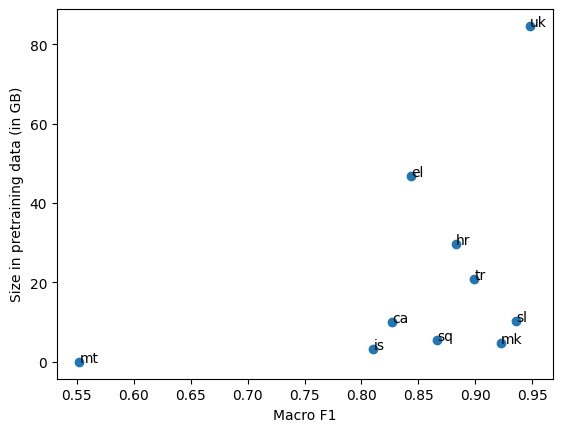

Pearsons correlation: 0.415
p-value: 0.23343624750296876
Spearmans correlation: 0.588
p-value: 0.07387770688865801


In [22]:
# Get results for sizes_mb and sizes_mb_related

analyse(macro_F1, sizes_mb_list, x_name="Macro F1", y_name="Size in pretraining data (in GB)")

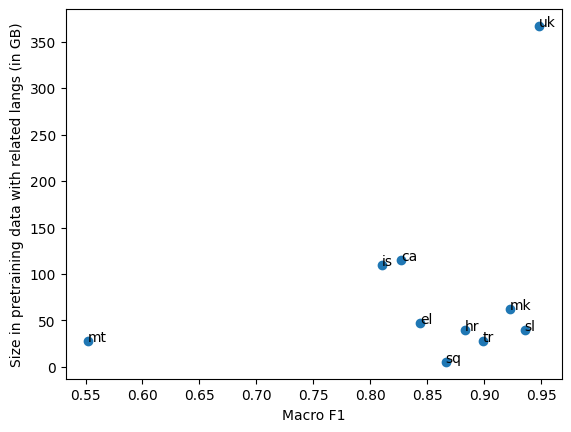

Pearsons correlation: 0.298
p-value: 0.40378781012771897
Spearmans correlation: 0.122
p-value: 0.7379379712336098


In [26]:
analyse(macro_F1, sizes_mb_related_list, x_name="Macro F1", y_name="Size in pretraining data with related langs (in GB)")

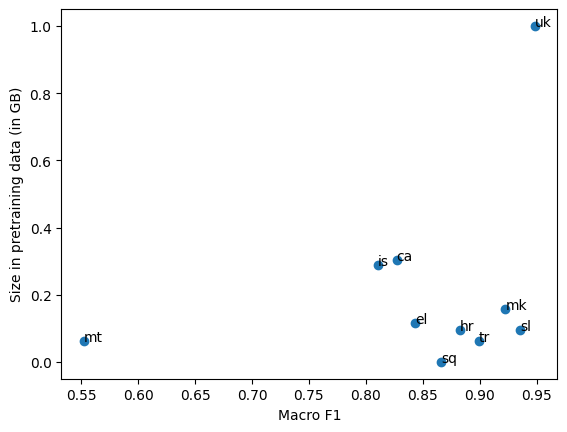

Pearsons correlation: 0.298
p-value: 0.40378781012771897
Spearmans correlation: 0.122
p-value: 0.7379379712336098


In [25]:
# Get results for sizes_mb and sizes_mb_related

analyse(macro_F1, sizes_mb_related_list_norm, x_name="Macro F1", y_name="Size in pretraining data (in GB)")

### Label-level correlation

In [ ]:
# Extract label-level F1 scores
label_scores = {}

for lang in list(main_dict.keys()):
	df = pd.DataFrame(main_dict[lang]["dataset"])
	y_true = df["y_true"].to_list()
	y_pred = df["y_pred"].to_list()

	labels = list(df["y_true"].unique())

	results = testing(y_true, y_pred, labels)

	label_scores[lang] = {}

	for label in labels:
		label_scores[lang][label] = results["report"][label]["f1-score"]

label_scores

In [8]:
# Save the label-level scores
with open("label-level-scores.json", "w") as label_scores_file:
	json.dump(label_scores, label_scores_file)

In [6]:
# Open label scores
with open("label-level-scores.json", "r") as label_scores_file:
	label_scores = json.load(label_scores_file)

In [7]:
labels = list(label_scores["mt"].keys())
labels

['News',
 'Opinion/Argumentation',
 'Instruction',
 'Information/Explanation',
 'Promotion',
 'Legal',
 'Forum',
 'Prose/Lyrical']

In [14]:
# Calculate label-level performance for each label, each dataset

# Create a dataframe with all values

df_results = pd.DataFrame({"sizes_gb": sizes_mb, "sizes_gb_related": sizes_mb_with_related, "label_scores": label_scores})

#Add macro_f1

df_results["macro_f1"] = macro_F1

# Add label specific scores

for label in labels:
	df_results[f"{label}_score"] = df_results["label_scores"].apply(lambda x:x[label])

df_results

,sizes_gb,sizes_gb_related,label_scores,macro_f1,News_score,Opinion/Argumentation_score,Instruction_score,Information/Explanation_score,Promotion_score,Legal_score,Forum_score,Prose/Lyrical_score
mt,0.0,28.0,"{'News': 0.6923076923076923, 'Opinion/Argument...",0.552357,0.692308,0.333333,0.689655,0.521739,0.818182,1.000000,0.181818,0.181818
el,46.9,46.9,"{'Instruction': 0.7058823529411764, 'Forum': 0...",0.843560,0.900000,0.869565,0.705882,0.695652,0.625000,1.000000,0.952381,1.000000
tr,20.9,27.4,"{'Instruction': 0.9, 'Legal': 1.0, 'Opinion/Ar...",0.899063,0.952381,0.818182,0.900000,0.823529,0.857143,1.000000,0.888889,0.952381
sq,5.4,5.4,"{'Opinion/Argumentation': 0.7, 'Legal': 0.9473...",0.866280,0.888889,0.700000,0.947368,0.800000,0.947368,0.947368,0.842105,0.857143
is,3.2,109.9,"{'Legal': 0.8421052631578948, 'Information/Exp...",0.810444,0.727273,0.818182,0.777778,0.588235,0.782609,0.842105,0.947368,1.000000
uk,84.6,366.9,"{'Instruction': 0.9523809523809523, 'Prose/Lyr...",0.948327,1.000000,0.909091,0.952381,1.000000,0.777778,1.000000,0.947368,1.000000
ca,10.1,115.4,"{'Forum': 0.8421052631578948, 'Information/Exp...",0.827101,0.823529,0.842105,0.750000,0.720000,0.782609,0.947368,0.842105,0.909091
mk,4.8,62.3,"{'Forum': 1.0, 'News': 0.9090909090909091, 'In...",0.922638,0.909091,0.777778,1.000000,0.842105,0.952381,0.947368,1.000000,0.952381
hr,29.7,40.0,"{'Promotion': 0.8695652173913044, 'Information...",0.882916,0.947368,0.777778,0.750000,0.952381,0.869565,1.000000,0.909091,0.857143
sl,10.3,40.0,"{'News': 0.9, 'Instruction': 1.0, 'Opinion/Arg...",0.935625,0.900000,0.823529,1.000000,0.900000,1.000000,0.952381,1.000000,0.909091


Size (in GB) and label F1 scores


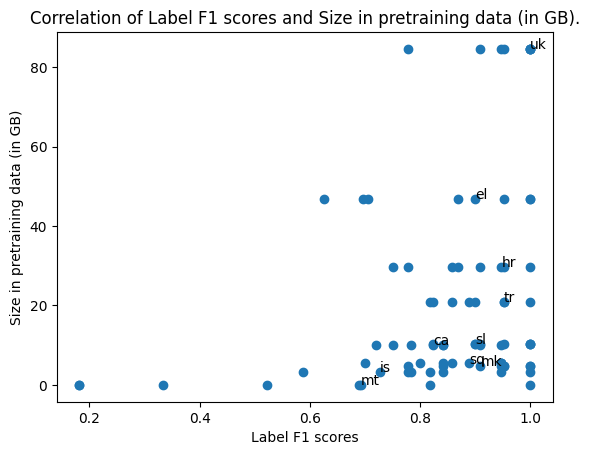

Pearsons correlation: 0.275
p-value: 0.013539468997046106
Spearmans correlation: 0.349
p-value: 0.0015106453984760197
Plot for size + related languages (in GB) and label F1 scores


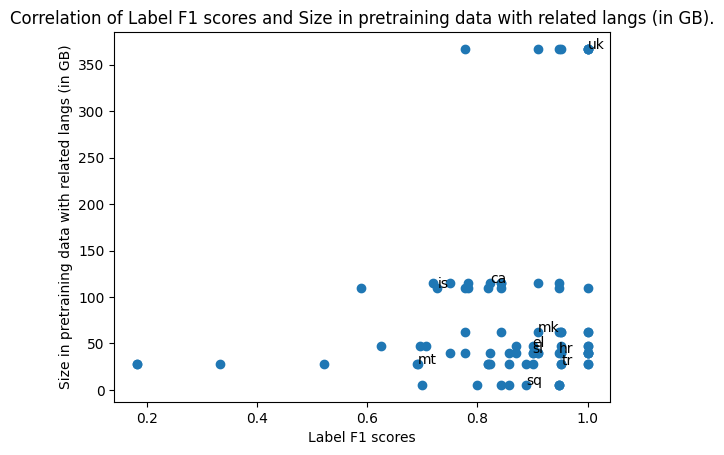

Pearsons correlation: 0.197
p-value: 0.07932862745724867
Spearmans correlation: 0.119
p-value: 0.2919649610699323


In [20]:
# Merge all label performance into one long vector

label_merged = []

for label in labels:
	# Create label performance list
	label_merged.extend(df_results[f"{label}_score"].to_list())

len(label_merged)

# Create size list - it should be sizes_gb x 8 (number of labels)
size_merged = []

for i in list(range(len(labels))):
	size_merged.extend(df_results["sizes_gb"].to_list())

size_related_merged = []

# Do the same with size with related list
for i in list(range(len(labels))):
	size_related_merged.extend(df_results["sizes_gb_related"].to_list())

# Plot
# Show the values on a scatter plot
print(f"Size (in GB) and label F1 scores")
analyse(label_merged, size_merged, "Label F1 scores", "Size in pretraining data (in GB)")


print(f"Plot for size + related languages (in GB) and label F1 scores")
# Show the values on a scatter plot
analyse(label_merged, size_related_merged, "Label F1 scores", "Size in pretraining data with related langs (in GB)")


# Correlation of token overlap and macro F1 scores

## Dataset-level

In [13]:
main_dict["sl"]['token_overlap'].keys()

dict_keys(['overlap_percentage', 'token_list', 'overlap_token_list', 'token_count', 'cosine_similarity', 'intersection_df', 'intersection_vector_size', 'label_level_token_lists', 'overlap_percentage_norm', 'overlap_token_list_norm', 'label_level_token_lists_norm', 'label_overlap_percentage_norm', 'label_overlap_token_list_norm'])

In [14]:
# Get an array of token overlap in percentages
overlap = [main_dict[x]['token_overlap']['overlap_percentage'] for x in list(main_dict.keys())]
overlap

[0.8170850409836066,
 0.1614276568501921,
 0.5215024680505782,
 0.605775337143711,
 0.5175752260153825,
 0.15667519020109233,
 0.7448809178042405,
 0.14598936285683273,
 0.8215173660815189,
 0.9742887570363609]

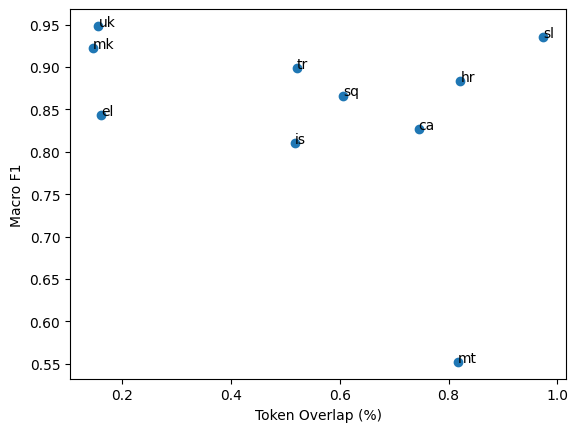

Pearsons correlation: -0.331
p-value: 0.3501872914118316
Spearmans correlation: -0.200
p-value: 0.5795840000000001


In [15]:
# Analyse the correlation
labels = list(main_dict.keys())
analyse(overlap, macro_F1, labels, x_name="Token Overlap (%)", y_name="Macro F1")

## Label-level

In [31]:
# Get label-level scores
label_scores = pd.read_json("datasets/label-level-scores.json")

label_scores

,mt,el,tr,sq,is,uk,ca,mk,hr,sl
News,0.692308,0.900000,0.952381,0.888889,0.727273,1.000000,0.823529,0.909091,0.947368,0.900000
Opinion/Argumentation,0.333333,0.869565,0.818182,0.700000,0.818182,0.909091,0.842105,0.777778,0.777778,0.823529
Instruction,0.689655,0.705882,0.900000,0.947368,0.777778,0.952381,0.750000,1.000000,0.750000,1.000000
Information/Explanation,0.521739,0.695652,0.823529,0.800000,0.588235,1.000000,0.720000,0.842105,0.952381,0.900000
Promotion,0.818182,0.625000,0.857143,0.947368,0.782609,0.777778,0.782609,0.952381,0.869565,1.000000
Legal,1.000000,1.000000,1.000000,0.947368,0.842105,1.000000,0.947368,0.947368,1.000000,0.952381
Forum,0.181818,0.952381,0.888889,0.842105,0.947368,0.947368,0.842105,1.000000,0.909091,1.000000
Prose/Lyrical,0.181818,1.000000,0.952381,0.857143,1.000000,1.000000,0.909091,0.952381,0.857143,0.909091


In [32]:
label_scores_dict = label_scores.to_dict()

In [33]:
# Get scores in format "mt-News"
label_scores_new_dict = {}

for lang in list(label_scores.keys()):
	for label in list(label_scores[lang].keys()):
		label_scores_new_dict[f"{lang}-{label}"] = label_scores[lang][label]

label_scores_new_dict

{'mt-News': 0.6923076923076921,
 'mt-Opinion/Argumentation': 0.33333333333333304,
 'mt-Instruction': 0.689655172413793,
 'mt-Information/Explanation': 0.521739130434782,
 'mt-Promotion': 0.818181818181818,
 'mt-Legal': 1.0,
 'mt-Forum': 0.18181818181818102,
 'mt-Prose/Lyrical': 0.18181818181818102,
 'el-News': 0.9,
 'el-Opinion/Argumentation': 0.8695652173913041,
 'el-Instruction': 0.7058823529411761,
 'el-Information/Explanation': 0.695652173913043,
 'el-Promotion': 0.625,
 'el-Legal': 1.0,
 'el-Forum': 0.9523809523809521,
 'el-Prose/Lyrical': 1.0,
 'tr-News': 0.9523809523809521,
 'tr-Opinion/Argumentation': 0.818181818181818,
 'tr-Instruction': 0.9,
 'tr-Information/Explanation': 0.8235294117647051,
 'tr-Promotion': 0.8571428571428571,
 'tr-Legal': 1.0,
 'tr-Forum': 0.8888888888888891,
 'tr-Prose/Lyrical': 0.9523809523809521,
 'sq-News': 0.8888888888888891,
 'sq-Opinion/Argumentation': 0.7000000000000001,
 'sq-Instruction': 0.9473684210526311,
 'sq-Information/Explanation': 0.8,
 'sq

In [36]:
label_scores_df = pd.DataFrame({"label":list(label_scores_new_dict.keys()), "F1": list(label_scores_new_dict.values())})
label_scores_df

,label,F1
0,mt-News,0.692308
1,mt-Opinion/Argumentation,0.333333
2,mt-Instruction,0.689655
3,mt-Information/Explanation,0.521739
4,mt-Promotion,0.818182
...,...,...
75,sl-Information/Explanation,0.900000
76,sl-Promotion,1.000000
77,sl-Legal,0.952381
78,sl-Forum,1.000000


In [34]:
# Get label-level overlap percentages
label_overlap = pd.read_csv("datasets/label-level-token-overlap.csv", index_col = 0)
label_overlap

,label,overlap
0,mt-Information/Explanation,0.714543
1,mt-News,0.712382
2,mt-Instruction,0.619401
3,mt-Opinion/Argumentation,0.682129
4,mt-Forum,0.583984
...,...,...
75,sl-Opinion/Argumentation,0.888709
76,sl-Forum,0.801008
77,sl-Prose/Lyrical,0.699553
78,sl-Legal,0.755659


In [37]:
# Merge the two dfs
label_merged = pd.merge(left=label_overlap, right=label_scores_df, on="label")
label_merged

,label,overlap,F1
0,mt-Information/Explanation,0.714543,0.521739
1,mt-News,0.712382,0.692308
2,mt-Instruction,0.619401,0.689655
3,mt-Opinion/Argumentation,0.682129,0.333333
4,mt-Forum,0.583984,0.181818
...,...,...,...
75,sl-Opinion/Argumentation,0.888709,0.823529
76,sl-Forum,0.801008,1.000000
77,sl-Prose/Lyrical,0.699553,0.909091
78,sl-Legal,0.755659,0.952381


Plot in different colors for each of the labels

In [39]:
# Add additional columns in the df with information on the labels and lang
label_merged["lang"] = label_merged["label"].apply(lambda x: x.split("-")[0])
label_merged["genre"] = label_merged["label"].apply(lambda x: x.split("-")[1])
label_merged.head(2)

,label,overlap,F1,lang,genre
0,mt-Information/Explanation,0.714543,0.521739,mt,Information/Explanation
1,mt-News,0.712382,0.692308,mt,News


In [18]:
label_merged[label_merged["lang"] == "mt"].sort_values(by="F1")

,label,overlap,F1,lang,genre
4,mt-Forum,0.583984,0.181818,mt,Forum
5,mt-Prose/Lyrical,0.591797,0.181818,mt,Prose/Lyrical
3,mt-Opinion/Argumentation,0.682129,0.333333,mt,Opinion/Argumentation
0,mt-Information/Explanation,0.714543,0.521739,mt,Information/Explanation
2,mt-Instruction,0.619401,0.689655,mt,Instruction
1,mt-News,0.712382,0.692308,mt,News
7,mt-Promotion,0.657877,0.818182,mt,Promotion
6,mt-Legal,0.676367,1.000000,mt,Legal


In [40]:
# Extract vectors for each genre
for label in ['Information/Explanation', 'News', 'Instruction','Opinion/Argumentation', 'Forum', 'Prose/Lyrical', 'Legal','Promotion']:
	current_df = label_merged[label_merged["genre"] == label]
	current_overlap = current_df["overlap"].to_list()
	current_F1 = current_df["F1"].to_list()

Text(0, 0.5, 'Token (Label-level) Overlap (%)')

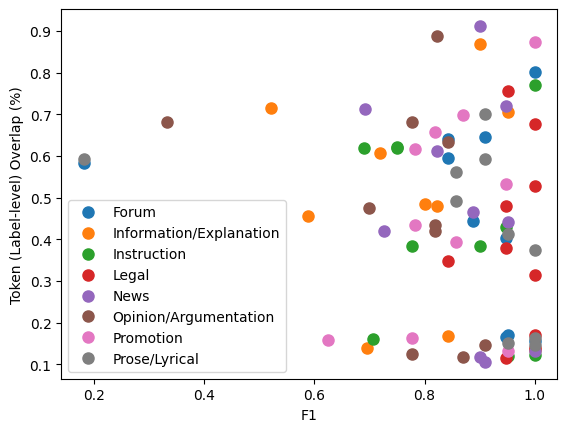

In [42]:
x = label_merged["F1"]
y = label_merged["overlap"]


# Define the criteria - based on which column will the instances be grouped
groups = label_merged.groupby('genre')

for name, group in groups:
    plt.plot(group["F1"], group["overlap"], marker='o', linestyle='', markersize=8, label=name);

plt.legend()
plt.xlabel("F1")
plt.ylabel("Token (Label-level) Overlap (%)")
#plt.title('Correlation of token overlap (%) and F1 scores for each of the labels')

# Correlation of token overlap - normalized text and macro F1 scores

## Dataset-level

In [16]:
# Get an array of token overlap in percentages
overlap = [main_dict[x]['token_overlap']['overlap_percentage_norm'] for x in list(main_dict.keys())]
overlap

[0.908775921807933,
 0.8952284699252726,
 0.7297271143797175,
 0.7799263351749539,
 0.8090693694879558,
 0.9001913444763352,
 0.8107813182016587,
 0.9051228437009932,
 0.8738561849368355,
 0.9835575485799701]

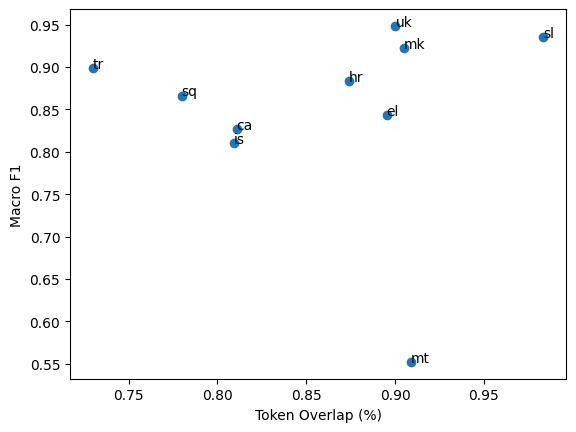

Pearsons correlation: -0.013
p-value: 0.9706328266736309
Spearmans correlation: 0.236
p-value: 0.5108853175152002


In [18]:
# Analyse the correlation
labels = list(main_dict.keys())
analyse(overlap, macro_F1, labels, x_name="Token Overlap (%)", y_name="Macro F1")

## Label-level

In [ ]:
# Get label-level scores
label_scores = pd.read_json("datasets/label-level-scores.json")

label_scores

,mt,el,tr,sq,is,uk,ca,mk,hr,sl
News,0.692308,0.900000,0.952381,0.888889,0.727273,1.000000,0.823529,0.909091,0.947368,0.900000
Opinion/Argumentation,0.333333,0.869565,0.818182,0.700000,0.818182,0.909091,0.842105,0.777778,0.777778,0.823529
Instruction,0.689655,0.705882,0.900000,0.947368,0.777778,0.952381,0.750000,1.000000,0.750000,1.000000
Information/Explanation,0.521739,0.695652,0.823529,0.800000,0.588235,1.000000,0.720000,0.842105,0.952381,0.900000
Promotion,0.818182,0.625000,0.857143,0.947368,0.782609,0.777778,0.782609,0.952381,0.869565,1.000000
Legal,1.000000,1.000000,1.000000,0.947368,0.842105,1.000000,0.947368,0.947368,1.000000,0.952381
Forum,0.181818,0.952381,0.888889,0.842105,0.947368,0.947368,0.842105,1.000000,0.909091,1.000000
Prose/Lyrical,0.181818,1.000000,0.952381,0.857143,1.000000,1.000000,0.909091,0.952381,0.857143,0.909091


In [ ]:
# Add a column which averages the resuls in each row

label_scores["average"] = label_scores.mean(axis=1)

# add average without Maltese
label_scores["average-wth-mt"] = label_scores.iloc[:, 1:].mean(axis=1)

label_scores.round(2)

,mt,el,tr,sq,is,uk,ca,mk,hr,sl,average,average-wth-mt
News,0.69,0.90,0.95,0.89,0.73,1.00,0.82,0.91,0.95,0.90,0.87,0.89
Opinion/Argumentation,0.33,0.87,0.82,0.70,0.82,0.91,0.84,0.78,0.78,0.82,0.77,0.81
Instruction,0.69,0.71,0.90,0.95,0.78,0.95,0.75,1.00,0.75,1.00,0.85,0.86
Information/Explanation,0.52,0.70,0.82,0.80,0.59,1.00,0.72,0.84,0.95,0.90,0.78,0.81
Promotion,0.82,0.62,0.86,0.95,0.78,0.78,0.78,0.95,0.87,1.00,0.84,0.84
Legal,1.00,1.00,1.00,0.95,0.84,1.00,0.95,0.95,1.00,0.95,0.96,0.96
Forum,0.18,0.95,0.89,0.84,0.95,0.95,0.84,1.00,0.91,1.00,0.85,0.92
Prose/Lyrical,0.18,1.00,0.95,0.86,1.00,1.00,0.91,0.95,0.86,0.91,0.86,0.93


In [ ]:
# Round values in label scores to two decimal places
print(label_scores.round(2).to_markdown())

|                         |   mt |   el |   tr |   sq |   is |   uk |   ca |   mk |   hr |   sl |   average |   average-wth-mt |
|:------------------------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|----------:|-----------------:|
| News                    | 0.69 | 0.9  | 0.95 | 0.89 | 0.73 | 1    | 0.82 | 0.91 | 0.95 | 0.9  |      0.87 |             0.89 |
| Opinion/Argumentation   | 0.33 | 0.87 | 0.82 | 0.7  | 0.82 | 0.91 | 0.84 | 0.78 | 0.78 | 0.82 |      0.77 |             0.81 |
| Instruction             | 0.69 | 0.71 | 0.9  | 0.95 | 0.78 | 0.95 | 0.75 | 1    | 0.75 | 1    |      0.85 |             0.86 |
| Information/Explanation | 0.52 | 0.7  | 0.82 | 0.8  | 0.59 | 1    | 0.72 | 0.84 | 0.95 | 0.9  |      0.78 |             0.81 |
| Promotion               | 0.82 | 0.62 | 0.86 | 0.95 | 0.78 | 0.78 | 0.78 | 0.95 | 0.87 | 1    |      0.84 |             0.84 |
| Legal                   | 1    | 1    | 1    | 0.95 | 0.84 | 1    | 0.95 | 0.95 | 1    | 0.95 |

In [ ]:
label_scores_dict = label_scores.to_dict()

In [ ]:
# Get scores in format "mt-News"
label_scores_new_dict = {}

for lang in list(label_scores.keys()):
	for label in list(label_scores[lang].keys()):
		label_scores_new_dict[f"{lang}-{label}"] = label_scores[lang][label]

label_scores_new_dict

{'mt-News': 0.6923076923076921,
 'mt-Opinion/Argumentation': 0.33333333333333304,
 'mt-Instruction': 0.689655172413793,
 'mt-Information/Explanation': 0.521739130434782,
 'mt-Promotion': 0.818181818181818,
 'mt-Legal': 1.0,
 'mt-Forum': 0.18181818181818102,
 'mt-Prose/Lyrical': 0.18181818181818102,
 'el-News': 0.9,
 'el-Opinion/Argumentation': 0.8695652173913041,
 'el-Instruction': 0.7058823529411761,
 'el-Information/Explanation': 0.695652173913043,
 'el-Promotion': 0.625,
 'el-Legal': 1.0,
 'el-Forum': 0.9523809523809521,
 'el-Prose/Lyrical': 1.0,
 'tr-News': 0.9523809523809521,
 'tr-Opinion/Argumentation': 0.818181818181818,
 'tr-Instruction': 0.9,
 'tr-Information/Explanation': 0.8235294117647051,
 'tr-Promotion': 0.8571428571428571,
 'tr-Legal': 1.0,
 'tr-Forum': 0.8888888888888891,
 'tr-Prose/Lyrical': 0.9523809523809521,
 'sq-News': 0.8888888888888891,
 'sq-Opinion/Argumentation': 0.7000000000000001,
 'sq-Instruction': 0.9473684210526311,
 'sq-Information/Explanation': 0.8,
 'sq

In [ ]:
label_scores_df = pd.DataFrame({"label":list(label_scores_new_dict.keys()), "F1": list(label_scores_new_dict.values())})
label_scores_df

,label,F1
0,mt-News,0.692308
1,mt-Opinion/Argumentation,0.333333
2,mt-Instruction,0.689655
3,mt-Information/Explanation,0.521739
4,mt-Promotion,0.818182
...,...,...
75,sl-Information/Explanation,0.900000
76,sl-Promotion,1.000000
77,sl-Legal,0.952381
78,sl-Forum,1.000000


In [ ]:
# Get label-level overlap percentages
label_overlap = pd.read_csv("datasets/label-level-token-overlap.csv", index_col = 0)
label_overlap

,label,overlap
0,mt-Information/Explanation,0.714543
1,mt-News,0.712382
2,mt-Instruction,0.619401
3,mt-Opinion/Argumentation,0.682129
4,mt-Forum,0.583984
...,...,...
75,sl-Opinion/Argumentation,0.888709
76,sl-Forum,0.801008
77,sl-Prose/Lyrical,0.699553
78,sl-Legal,0.755659


In [ ]:
# Merge the two dfs
label_merged = pd.merge(left=label_overlap, right=label_scores_df, on="label")
label_merged

,label,overlap,F1
0,mt-Information/Explanation,0.714543,0.521739
1,mt-News,0.712382,0.692308
2,mt-Instruction,0.619401,0.689655
3,mt-Opinion/Argumentation,0.682129,0.333333
4,mt-Forum,0.583984,0.181818
...,...,...,...
75,sl-Opinion/Argumentation,0.888709,0.823529
76,sl-Forum,0.801008,1.000000
77,sl-Prose/Lyrical,0.699553,0.909091
78,sl-Legal,0.755659,0.952381


In [ ]:
# Merge the two dfs
label_merged = pd.merge(left=label_overlap, right=label_scores_df, on="label")
label_merged

,label,overlap,F1
0,mt-Information/Explanation,0.714543,0.521739
1,mt-News,0.712382,0.692308
2,mt-Instruction,0.619401,0.689655
3,mt-Opinion/Argumentation,0.682129,0.333333
4,mt-Forum,0.583984,0.181818
...,...,...,...
75,sl-Opinion/Argumentation,0.888709,0.823529
76,sl-Forum,0.801008,1.000000
77,sl-Prose/Lyrical,0.699553,0.909091
78,sl-Legal,0.755659,0.952381


Plot in different colors for each of the labels

In [ ]:
# Add additional columns in the df with information on the labels and lang
label_merged["lang"] = label_merged["label"].apply(lambda x: x.split("-")[0])
label_merged["genre"] = label_merged["label"].apply(lambda x: x.split("-")[1])
label_merged.head(2)

,label,overlap,F1,lang,genre
0,mt-Information/Explanation,0.714543,0.521739,mt,Information/Explanation
1,mt-News,0.712382,0.692308,mt,News


In [ ]:
label_merged[label_merged["genre"] == "News"]

,label,overlap,F1,lang,genre
1,mt-News,0.712382,0.692308,mt,News
9,el-News,0.116252,0.900000,el,News
17,tr-News,0.441053,0.952381,tr,News
25,sq-News,0.465010,0.888889,sq,News
33,is-News,0.419619,0.727273,is,News
41,uk-News,0.131128,1.000000,uk,News
49,ca-News,0.612557,0.823529,ca,News
57,mk-News,0.105347,0.909091,mk,News
65,hr-News,0.719493,0.947368,hr,News
73,sl-News,0.912225,0.900000,sl,News


In [ ]:
# Extract vectors for each genre
for label in ['Information/Explanation', 'News', 'Instruction','Opinion/Argumentation', 'Forum', 'Prose/Lyrical', 'Legal','Promotion']:
	current_df = label_merged[label_merged["genre"] == label]
	current_overlap = current_df["overlap"].to_list()
	current_F1 = current_df["F1"].to_list()

Text(0, 0.5, 'Token overlap (%)')

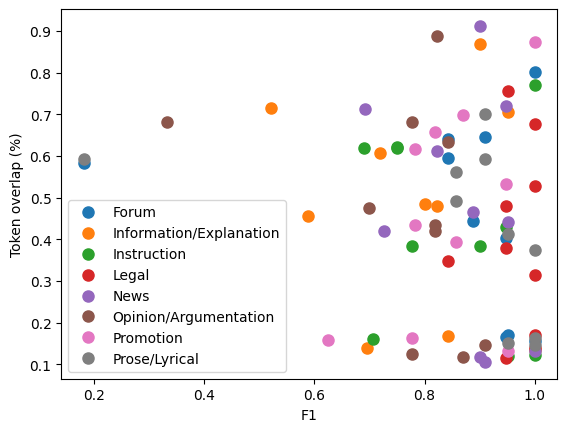

In [ ]:
x = label_merged["F1"]
y = label_merged["overlap"]


# Define the criteria - based on which column will the instances be grouped
groups = label_merged.groupby('genre')

for name, group in groups:
    plt.plot(group["F1"], group["overlap"], marker='o', linestyle='', markersize=8, label=name);

plt.legend()
plt.xlabel("F1")
plt.ylabel("Token overlap (%)")
#plt.title('Correlation of token overlap (%) and F1 scores for each of the labels')

# Correlation of cosine similarity for token overlap and macro F1 scores

## Dataset-level

In [19]:
# Get an array of cosine similarity
overlap = [main_dict[x]['token_overlap']['cosine_similarity'] for x in list(main_dict.keys())]
overlap

[0.4142476865826809,
 0.5273207128330722,
 0.5938472232210807,
 0.43448915477115685,
 0.5251354659540077,
 0.5846121788244142,
 0.5254392489246424,
 0.4225320009293607,
 0.5662098277228971,
 0.6334513674796362]

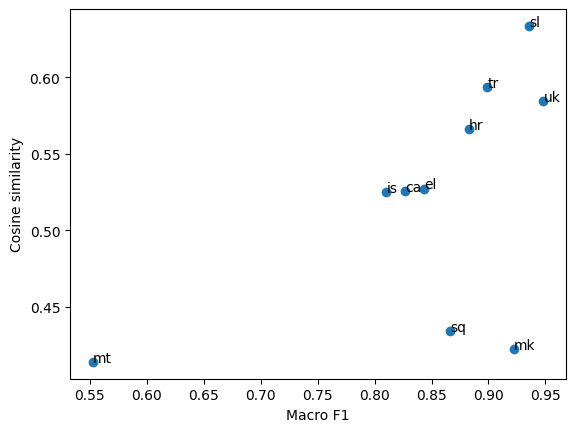

Pearsons correlation: 0.560
p-value: 0.0926047843840466
Spearmans correlation: 0.624
p-value: 0.053717767217167395


In [21]:
# Analyse the correlation
labels = list(main_dict.keys())
analyse(macro_F1, overlap, labels, x_name="Macro F1", y_name="Cosine similarity")

# Correlation of lang2vec features and performance

In [5]:
# Import the cosine similarity values for all features
with open("datasets/lang2vec_cosine_similarities.json", "r") as json_file:
	features_dict = json.load(json_file)

features_dict

{'syntax_knn': {'sl': {'similarity-to-sl': 1.0,
   'similarity-to-en': 0.7071067811865476,
   'avg_similarity': 0.8535533905932737},
  'hr': {'similarity-to-sl': 0.9259259259259259,
   'similarity-to-en': 0.7463904912524668,
   'avg_similarity': 0.8361582085891963},
  'sr': {'similarity-to-sl': 0.9819805060619657,
   'similarity-to-en': 0.6943650748294136,
   'avg_similarity': 0.8381727904456897},
  'hbs': {'similarity-to-sl': 0.9629629629629629,
   'similarity-to-en': 0.6678230711206282,
   'avg_similarity': 0.8153930170417956},
  'mk': {'similarity-to-sl': 0.9456108576893003,
   'similarity-to-en': 0.7715167498104595,
   'avg_similarity': 0.85856380374988},
  'bg': {'similarity-to-sl': 0.8888888888888888,
   'similarity-to-en': 0.7856742013183862,
   'avg_similarity': 0.8372815451036375},
  'is': {'similarity-to-sl': 0.7925939239012171,
   'similarity-to-en': 0.8006407690254358,
   'avg_similarity': 0.7966173464633264},
  'tr': {'similarity-to-sl': 0.42339019740572553,
   'similarity

In [6]:
features_dict.keys()

dict_keys(['syntax_knn', 'inventory_knn', 'fam', 'inventory_average', 'geo'])

In [26]:
def feature_df(feature, main_dict=main_dict):
	# Get an array of macro F1 values
	macro_F1_df = pd.DataFrame({"macro_f1":[main_dict[x]["macro_f1"] for x in list(main_dict.keys())], "index": list(main_dict.keys())})

	# Create a features df
	feature_df = pd.DataFrame(features_dict[feature]).transpose()
	feature_df.reset_index(inplace=True)

	# Add macro F1 scores to the features_df
	feature_df = pd.merge(left=feature_df, right=macro_F1_df, on="index")

	return feature_df

In [27]:
syntax_knn_df = feature_df("syntax_knn")
syntax_knn_df.head(2)

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.707107,0.853553,0.935625
1,hr,0.925926,0.746390,0.836158,0.882916


Correlation for syntax_knn

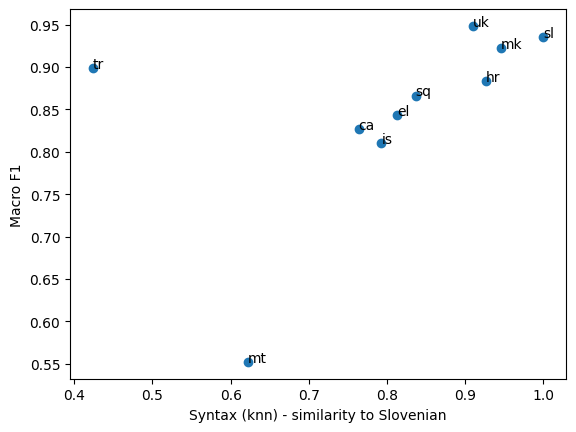

Pearsons correlation: 0.447
p-value: 0.19490181778710994
Spearmans correlation: 0.648
p-value: 0.04254012768448945


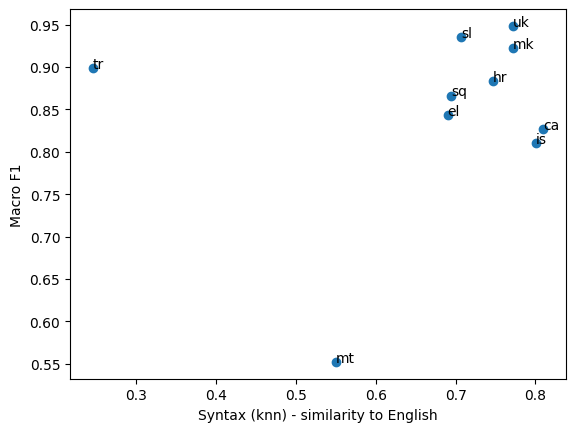

Pearsons correlation: 0.172
p-value: 0.6350502477282238
Spearmans correlation: 0.030
p-value: 0.9335717251179997


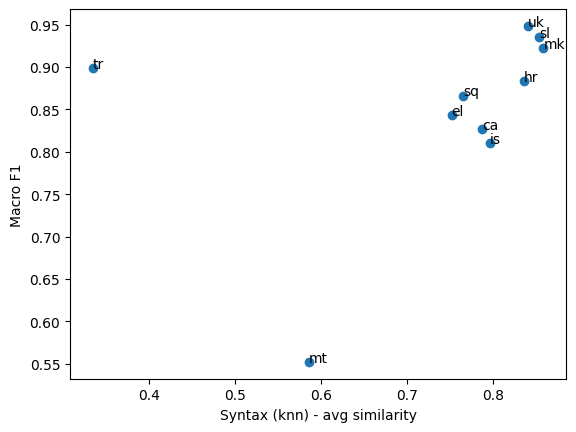

Pearsons correlation: 0.324
p-value: 0.36119136349121506
Spearmans correlation: 0.588
p-value: 0.07387770688865801


In [29]:
# Analyse the correlation
labels = syntax_knn_df["index"].to_list()
analyse(syntax_knn_df["similarity-to-sl"].to_list(), syntax_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = syntax_knn_df["index"].to_list()
analyse(syntax_knn_df["similarity-to-en"].to_list(), syntax_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = syntax_knn_df["index"].to_list()
analyse(syntax_knn_df["avg_similarity"].to_list(), syntax_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")

In [30]:
inventory_knn_df = feature_df("inventory_knn")

inventory_knn_df

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.645497,0.822749,0.935625
1,hr,0.801784,0.552052,0.676918,0.882916
2,mk,0.723568,0.560473,0.642021,0.922638
3,is,0.617213,0.627495,0.622354,0.810444
4,tr,0.510688,0.517294,0.513991,0.899063
5,uk,0.681005,0.626411,0.653708,0.948327
6,ca,0.796003,0.645942,0.720973,0.827101
7,el,0.608781,0.471560,0.540170,0.843560
8,mt,0.547723,0.530330,0.539026,0.552357
9,sq,0.653197,0.600833,0.627015,0.866280


correlation for inventory knn

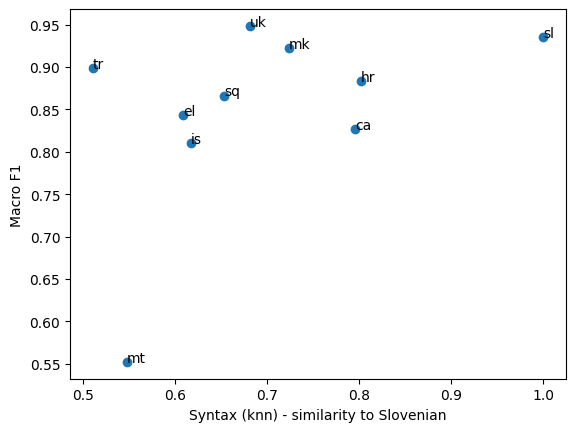

Pearsons correlation: 0.446
p-value: 0.1968610298226129
Spearmans correlation: 0.430
p-value: 0.21449233253280775


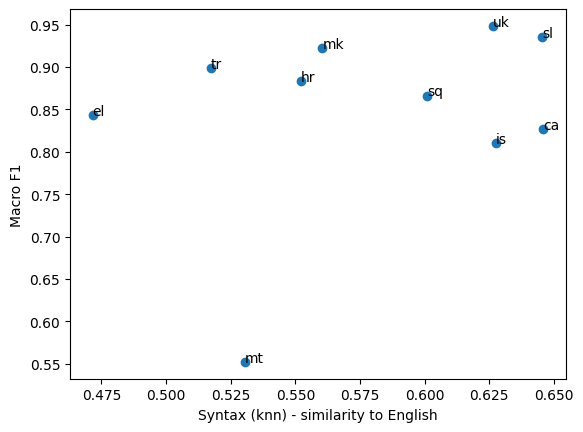

Pearsons correlation: 0.278
p-value: 0.43747831239318236
Spearmans correlation: 0.115
p-value: 0.7514196523258483


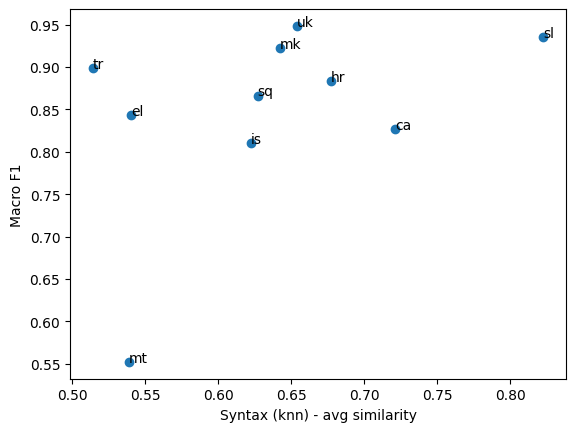

Pearsons correlation: 0.435
p-value: 0.20916257361978804
Spearmans correlation: 0.418
p-value: 0.22911284098281892


In [31]:
# Analyse the correlation
labels = inventory_knn_df["index"].to_list()
analyse(inventory_knn_df["similarity-to-sl"].to_list(), inventory_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = inventory_knn_df["index"].to_list()
analyse(inventory_knn_df["similarity-to-en"].to_list(), inventory_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = inventory_knn_df["index"].to_list()
analyse(inventory_knn_df["avg_similarity"].to_list(), inventory_knn_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")

In [33]:
inventory_average_df = feature_df("inventory_average")
inventory_average_df

,index,similarity-to-sl,similarity-to-en,avg_similarity,macro_f1
0,sl,1.000000,0.645497,0.822749,0.935625
1,hr,0.801784,0.552052,0.676918,0.882916
2,mk,0.723568,0.560473,0.642021,0.922638
3,is,0.617213,0.627495,0.622354,0.810444
4,tr,0.584202,0.536321,0.560262,0.899063
5,uk,0.681005,0.626411,0.653708,0.948327
6,ca,0.796003,0.645942,0.720973,0.827101
7,el,0.608781,0.471560,0.540170,0.843560
8,mt,0.547723,0.530330,0.539026,0.552357
9,sq,0.663221,0.610053,0.636637,0.866280


correlation for inventory_average

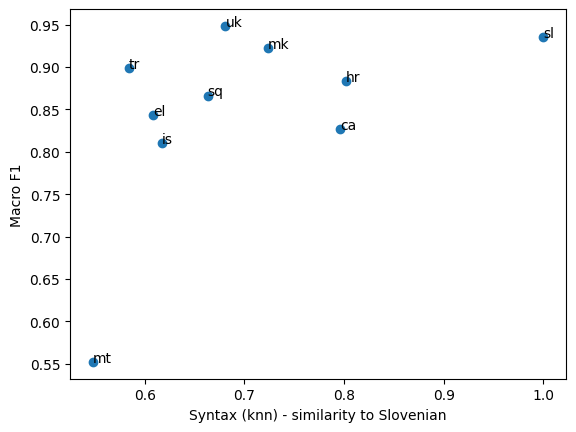

Pearsons correlation: 0.504
p-value: 0.13762420308371767
Spearmans correlation: 0.503
p-value: 0.13833369839449197


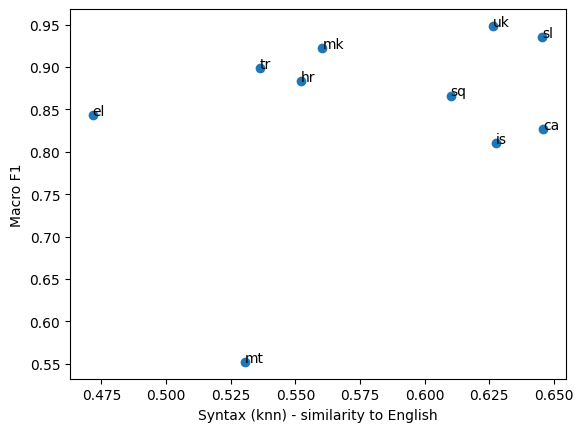

Pearsons correlation: 0.303
p-value: 0.39527712670278464
Spearmans correlation: 0.188
p-value: 0.603217610029209


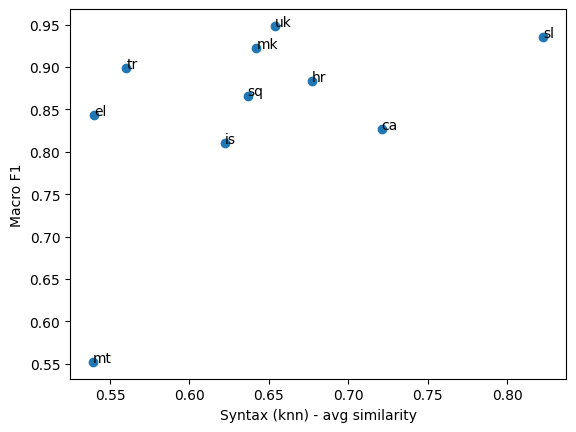

Pearsons correlation: 0.492
p-value: 0.14853884731951986
Spearmans correlation: 0.527
p-value: 0.11730806555020223


In [34]:
# Analyse the correlation
labels = inventory_average_df["index"].to_list()
analyse(inventory_average_df["similarity-to-sl"].to_list(), inventory_average_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = inventory_average_df["index"].to_list()
analyse(inventory_average_df["similarity-to-en"].to_list(), inventory_average_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = inventory_average_df["index"].to_list()
analyse(inventory_average_df["avg_similarity"].to_list(), inventory_average_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")

In [ ]:
fam_df = feature_df("fam")
fam_df

In [ ]:
# Analyse the correlation
labels = fam_df["index"].to_list()
analyse(fam_df["similarity-to-sl"].to_list(), fam_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to Slovenian", y_name="Macro F1")

# Analyse the correlation
labels = fam_df["index"].to_list()
analyse(fam_df["similarity-to-en"].to_list(), fam_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - similarity to English", y_name="Macro F1")

# Analyse the correlation
labels = fam_df["index"].to_list()
analyse(fam_df["avg_similarity"].to_list(), fam_df["macro_f1"].to_list(), labels, x_name="Syntax (knn) - avg similarity", y_name="Macro F1")